# DATA 3500 - Data Dive 1
## James E., Juan G., Nicholas S.

In [1]:
# Imports


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('ggplot') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import os
%pip install dython

import scipy.stats as stats


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Confirm the current working directory to make reading data frame easier

os.getcwd()

'/Users/nicksartino/Code/Data-Dive-1'

In [3]:
# Read data and list basic information

df = pd.read_csv('survey lung cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
# List some descriptive statistics for the numerical columns

df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
# Preview the data

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


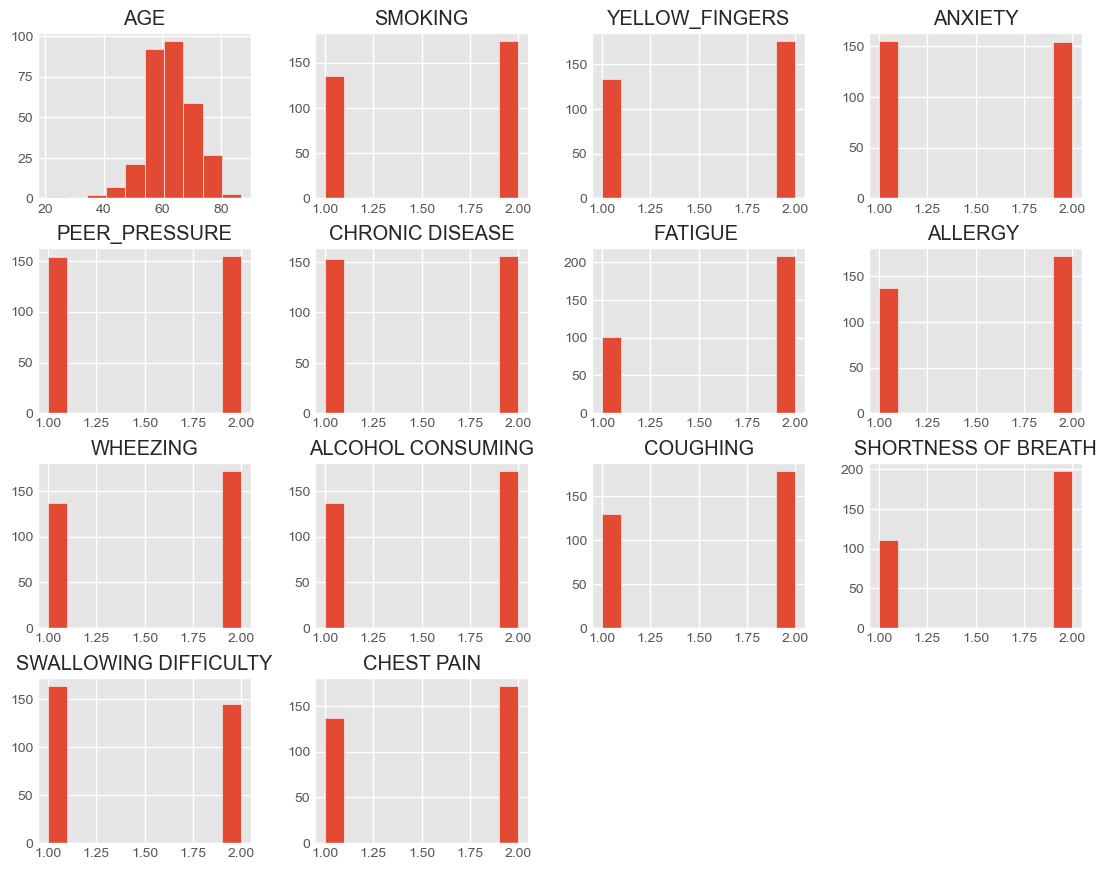

In [6]:
# Take a look at the histograms for all variables to get a quick look at their values and distributions

df.hist(figsize=(12,10))
plt.show()

In [7]:
# Define bin edges and labels for later analysis

bin_edges = [20, 30, 40, 50, 60, 70, 80, 90]
bin_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Create bins using pd.cut()
df['AGE_BINS'] = pd.cut(df['AGE'], bins=bin_edges, labels=bin_labels)

# Print the DataFrame to confirm the results are appended to the dataframe correctly
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_BINS
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,60-69
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,70-79
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,50-59
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,60-69
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,60-69


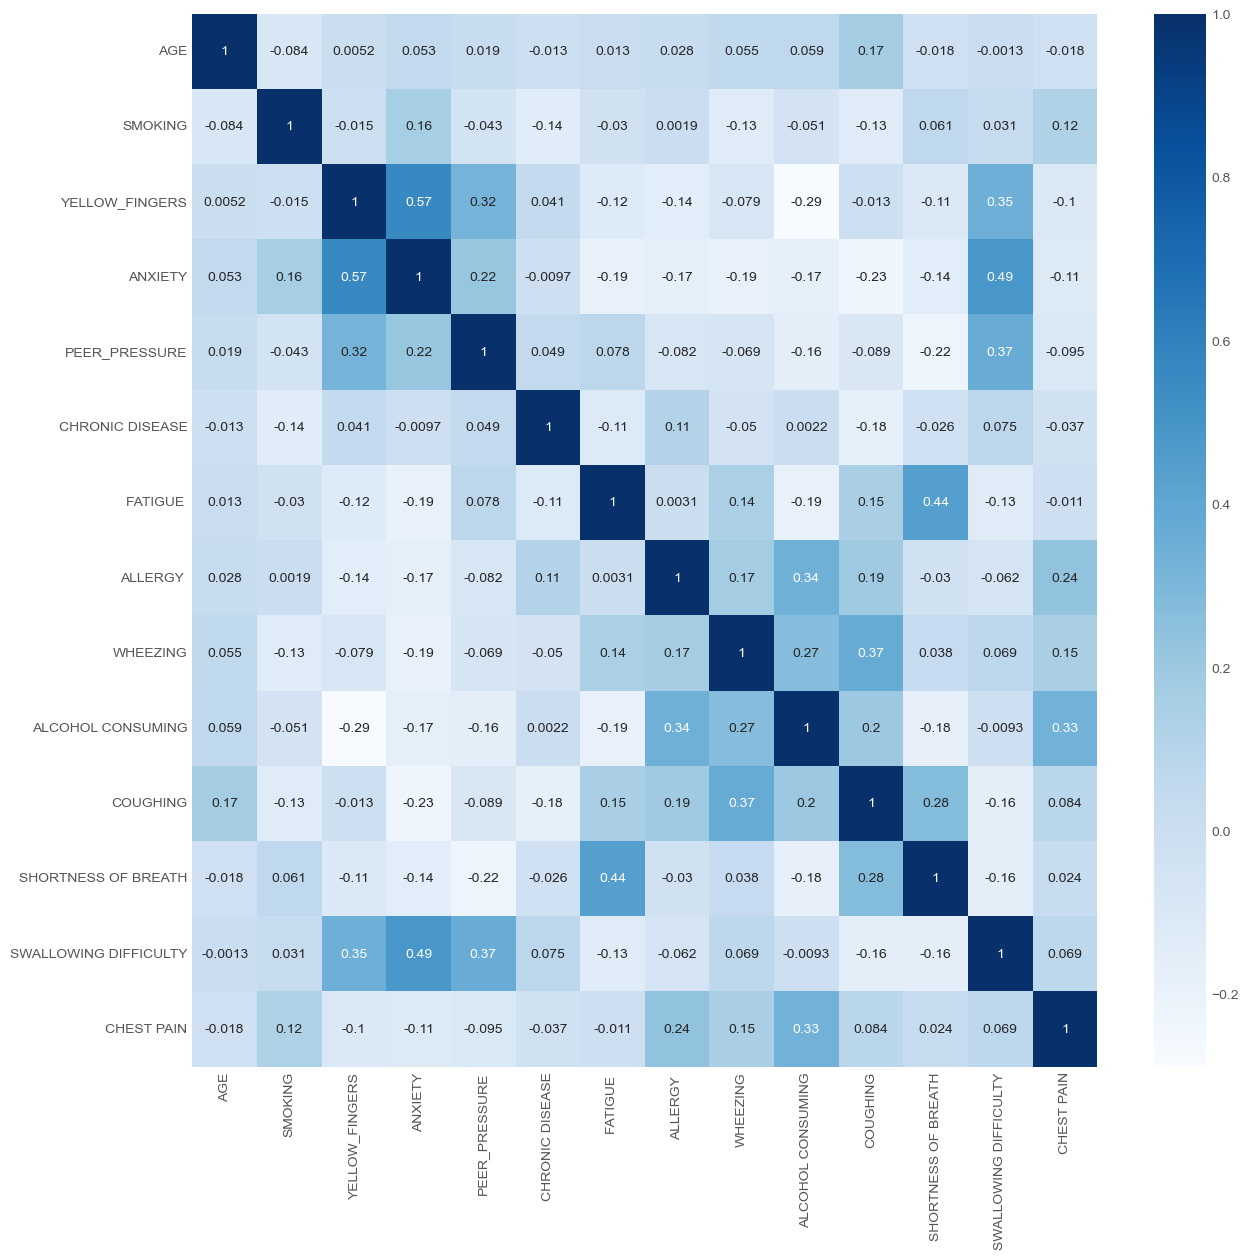

In [8]:
# Create a single correlation matrix for individual binary variables
# Clarify if any 2 variables are interacting in a cooperative way that mey be indicative of cancer formation 

corr = df.corr(numeric_only=True)
features = corr.index
plt.figure(figsize=(13,13))
ax = sns.heatmap(df[features].corr(), annot=True, cmap='Blues')

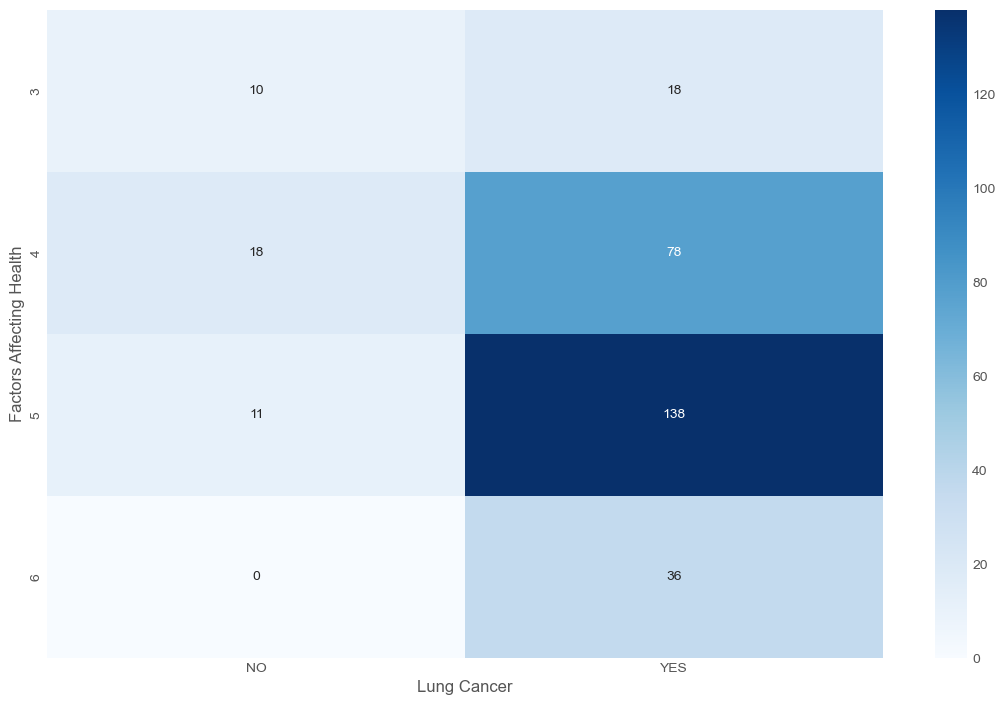

In [9]:
#Create variable that encompasses the three variables that affect the overall health of patient

df['FAH'] = df['ALCOHOL CONSUMING'] + df['CHRONIC DISEASE'] + df['SMOKING']

#Create a contingency table for new variable FAH
contingency = pd.crosstab(df['FAH'], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="Blues",fmt = '.0f')
plt.ylabel('Factors Affecting Health')
plt.xlabel('Lung Cancer');


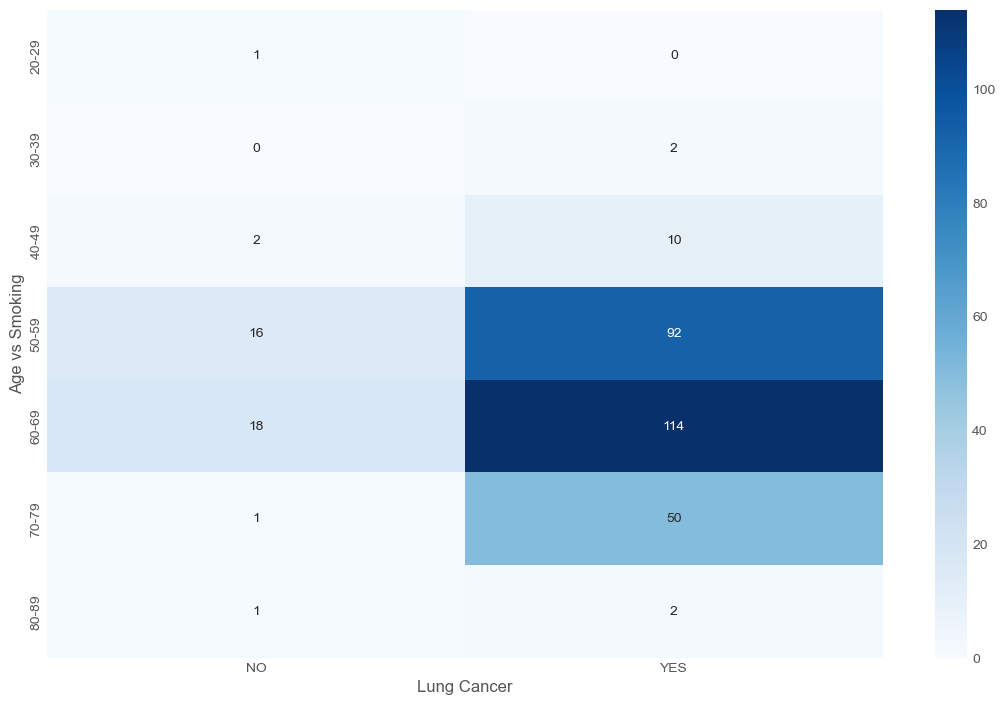

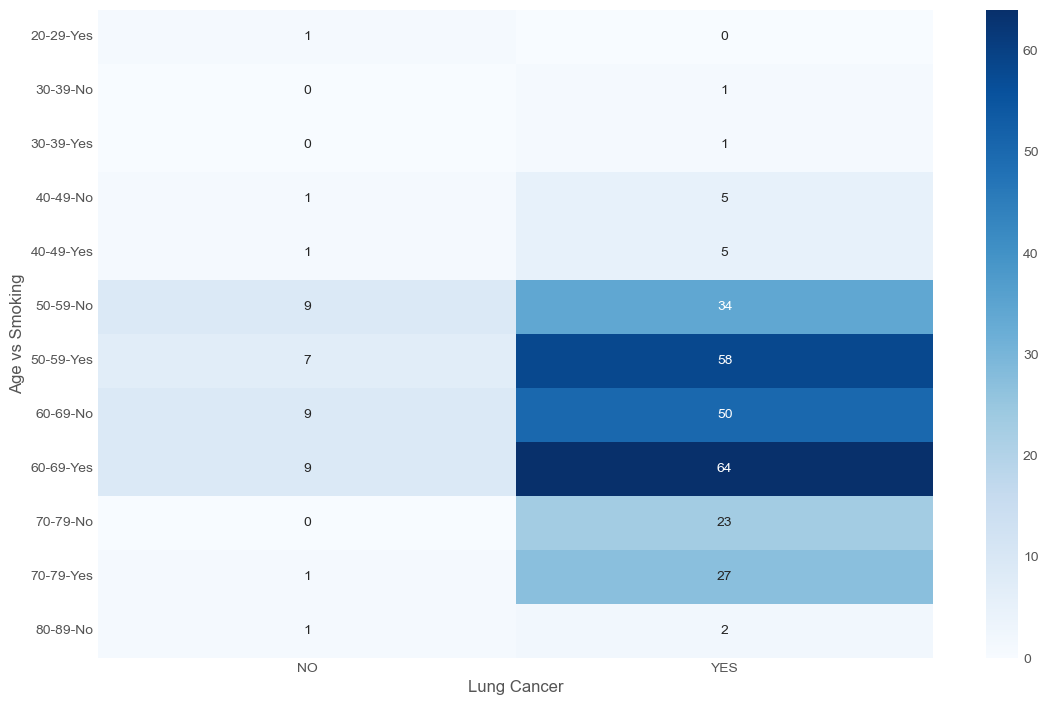

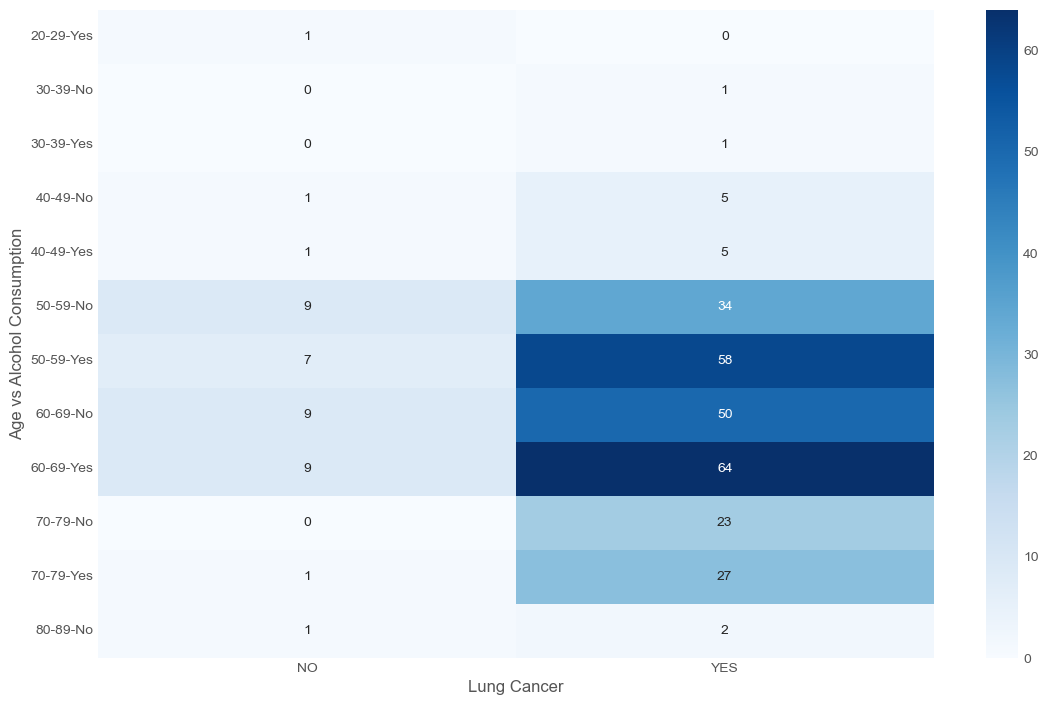

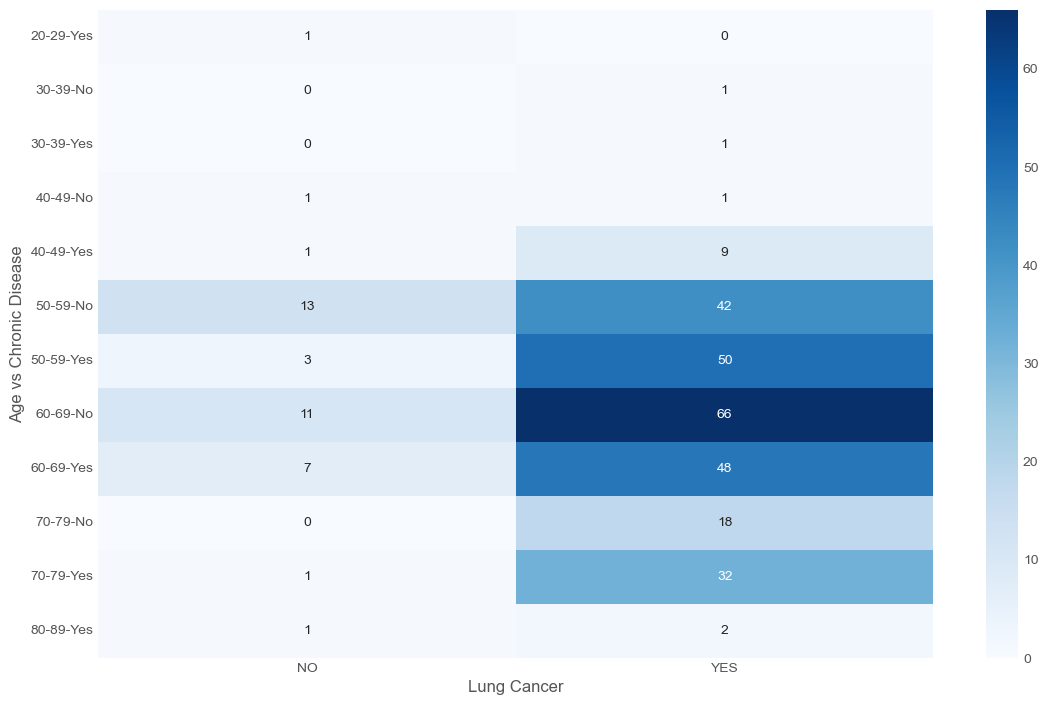

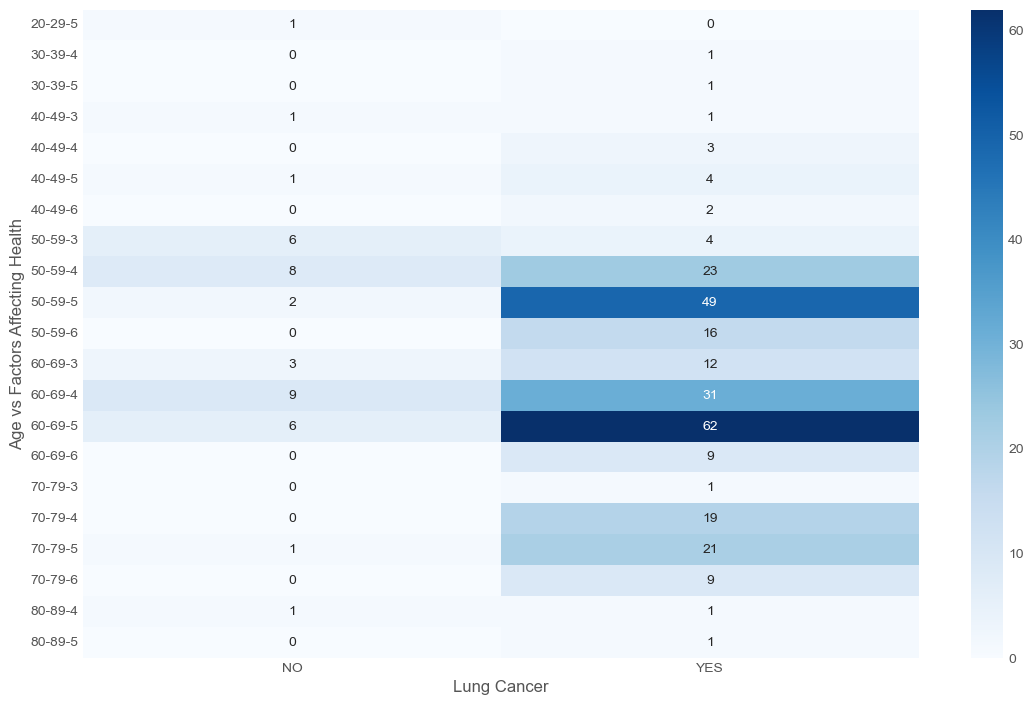

In [10]:
# Above grouped by Age Bins

yes_df = df.replace(2,'Yes')
no_df = yes_df.replace(1,'No')

# Age 
contingency = pd.crosstab(no_df['AGE_BINS'], no_df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="Blues",fmt = '.0f')
plt.ylabel('Age vs Smoking')
plt.xlabel('Lung Cancer')

# Smoking grouped by age
contingency = pd.crosstab([no_df['AGE_BINS'],no_df['SMOKING']], no_df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="Blues",fmt = '.0f')
plt.ylabel('Age vs Smoking')
plt.xlabel('Lung Cancer')

# Drinking Grouped by age
contingency = pd.crosstab([no_df['AGE_BINS'],no_df['SMOKING']], no_df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="Blues",fmt = '.0f')
plt.ylabel('Age vs Alcohol Consumption')
plt.xlabel('Lung Cancer')

# Chronic Diseases Grouped by Age
contingency = pd.crosstab([no_df['AGE_BINS'],no_df['CHRONIC DISEASE']], no_df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="Blues",fmt = '.0f')
plt.ylabel('Age vs Chronic Disease')
plt.xlabel('Lung Cancer')

# Factors affecting health by age
contingency = pd.crosstab([no_df['AGE_BINS'],no_df['FAH']], no_df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="Blues",fmt = '.0f')
plt.ylabel('Age vs Factors Affecting Health')
plt.xlabel('Lung Cancer');

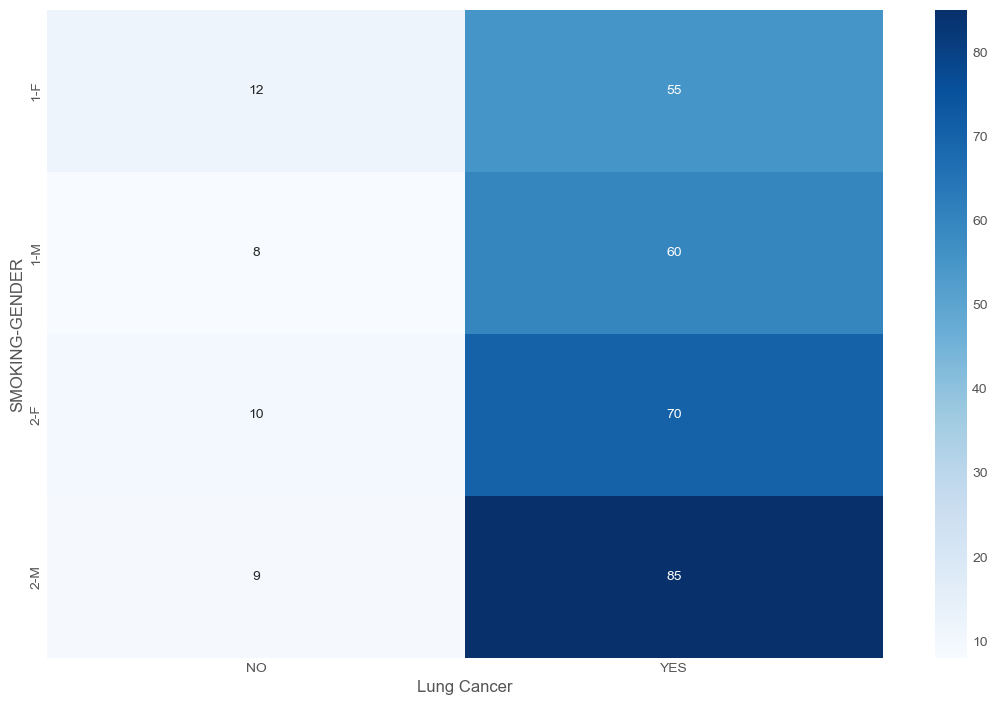

In [11]:
# Standard contingency table for now how to read them

STANDARD = pd.crosstab([df['SMOKING'],df['GENDER']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(STANDARD, annot=True, cmap="Blues",fmt = '.0f')
plt.xlabel('Lung Cancer');

# WILL NOT BE USED ONLY NEEDED TO UNDERSTAND THE STRUCTURE OF THE CONTINGENCY TABLES

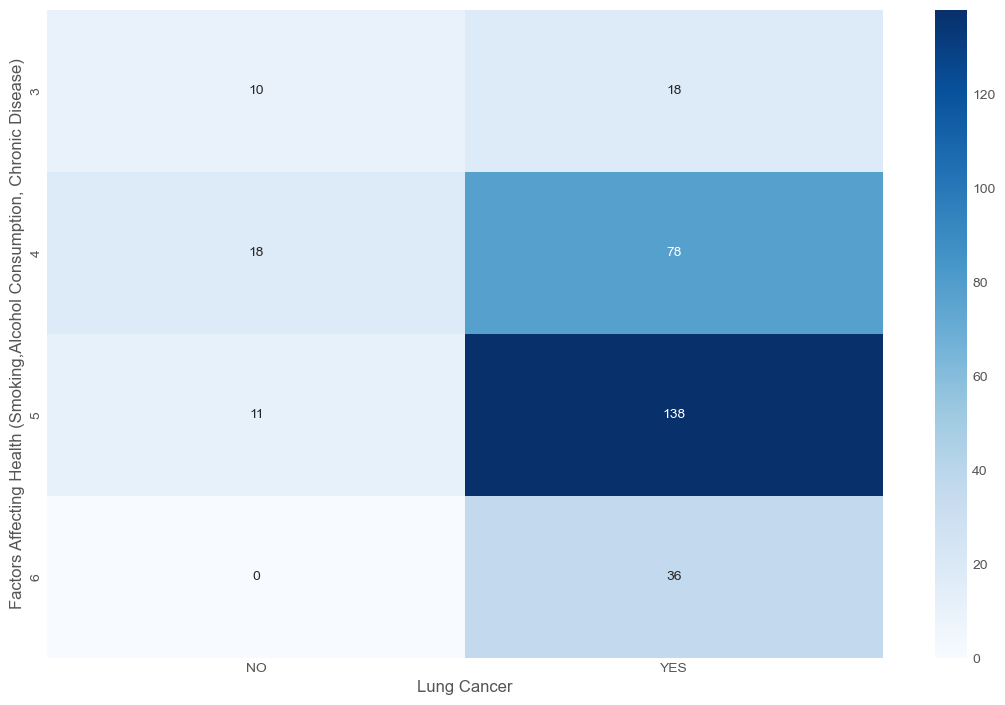

In [12]:
# Contingency table for newly added variable FAH (Factors Affecting Health)
contingency = pd.crosstab([df['FAH']], df['LUNG_CANCER'])

#Heat map
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="Blues",fmt = '.0f')
plt.ylabel('Factors Affecting Health (Smoking,Alcohol Consumption, Chronic Disease)')
plt.xlabel('Lung Cancer');

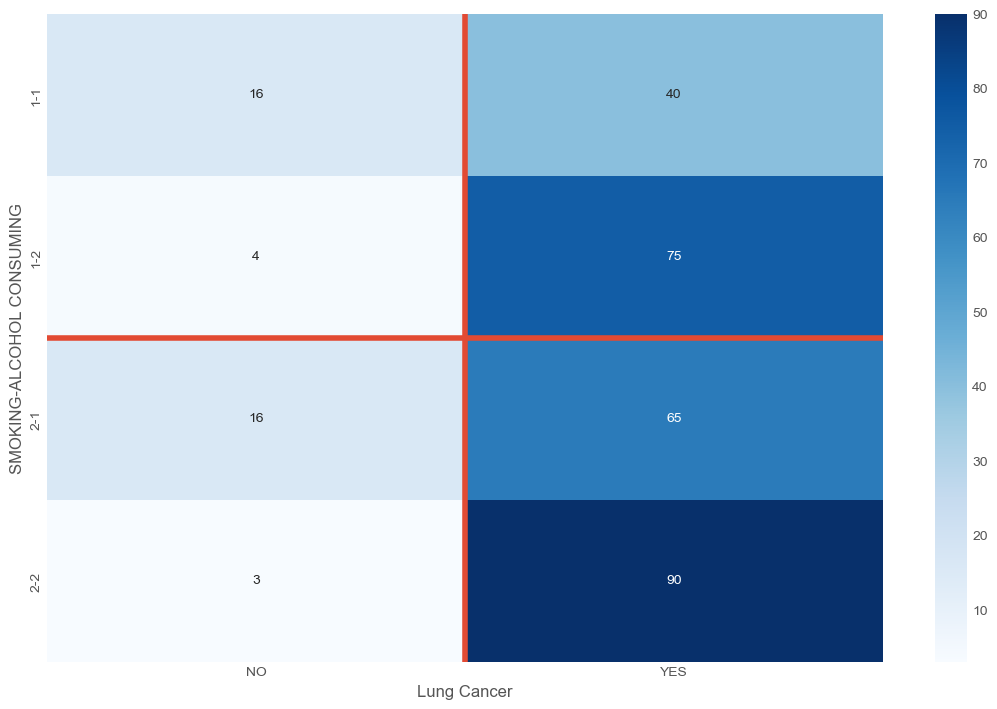

In [13]:
# Contingency table and heat map of Smoking and Alcohol as cooperative effectors
cont = pd.crosstab([df['SMOKING'],df['ALCOHOL CONSUMING']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(cont, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

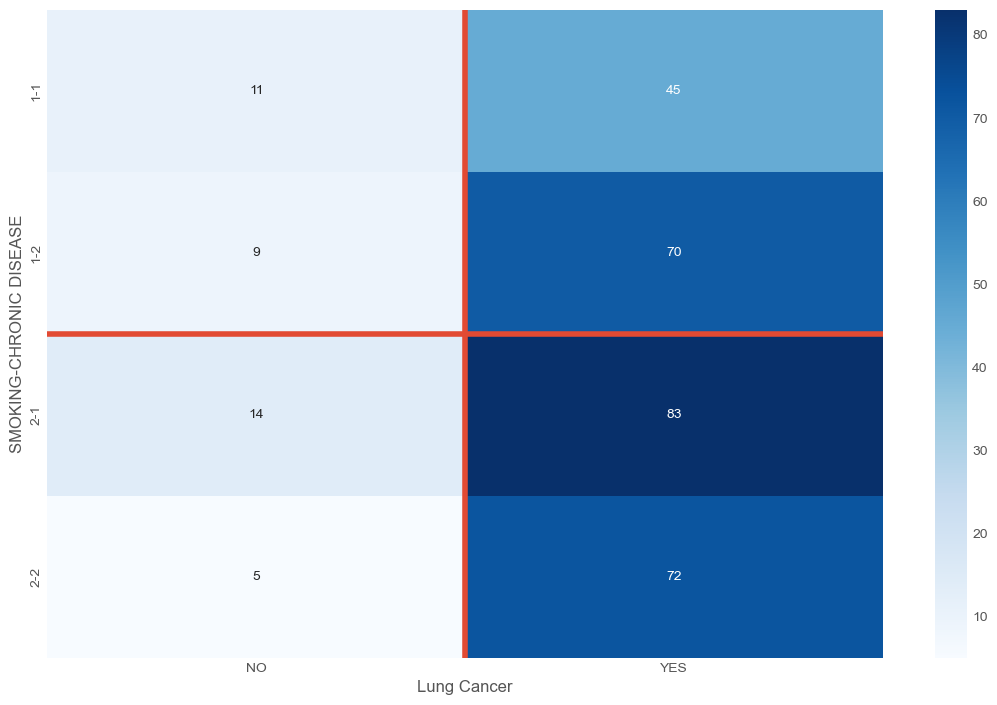

In [14]:
# Contingency table for smoking and chronic disease

SMOKE_CD = pd.crosstab([df['SMOKING'],df['CHRONIC DISEASE']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(SMOKE_CD, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

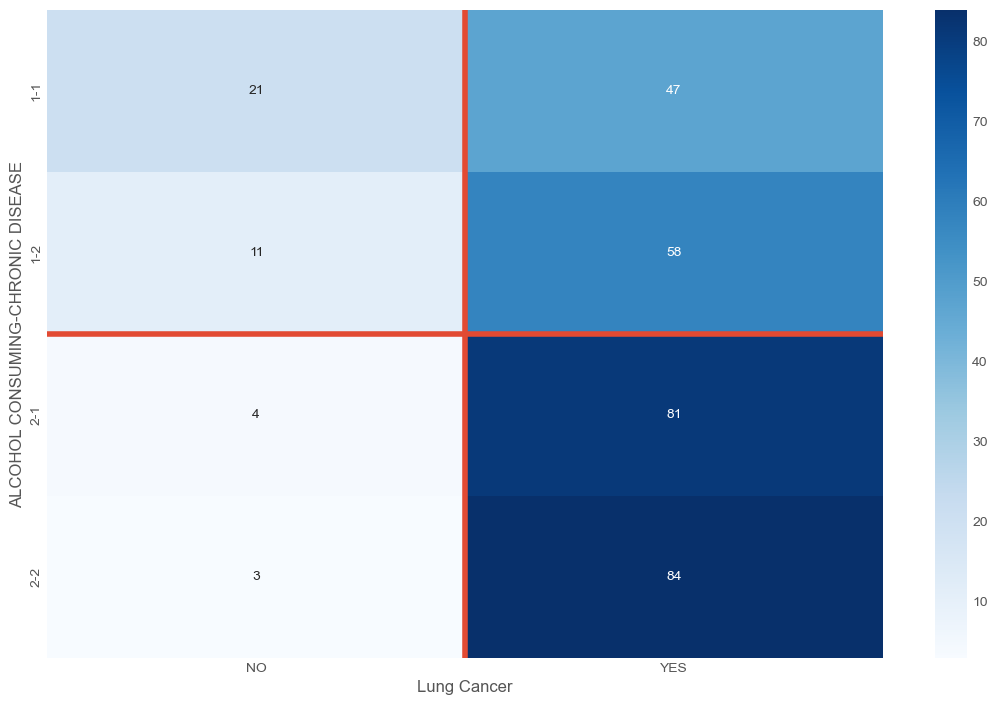

In [15]:
#Contingency table for alcohol and chronic disease

ALCOHOL_CD = pd.crosstab([df['ALCOHOL CONSUMING'],df['CHRONIC DISEASE']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(ALCOHOL_CD, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');


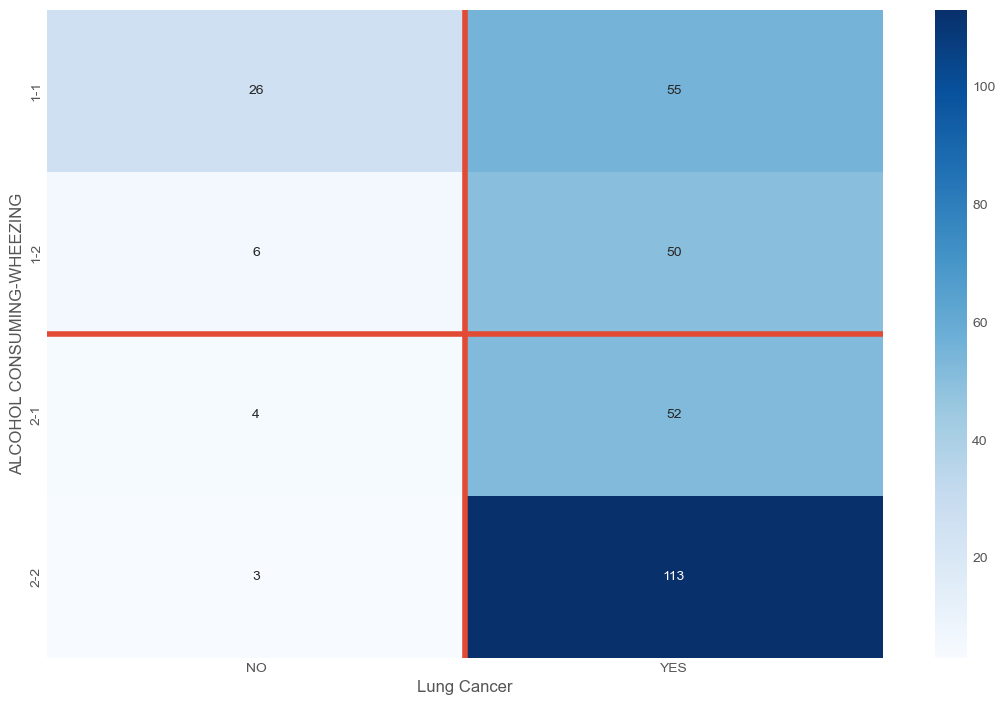

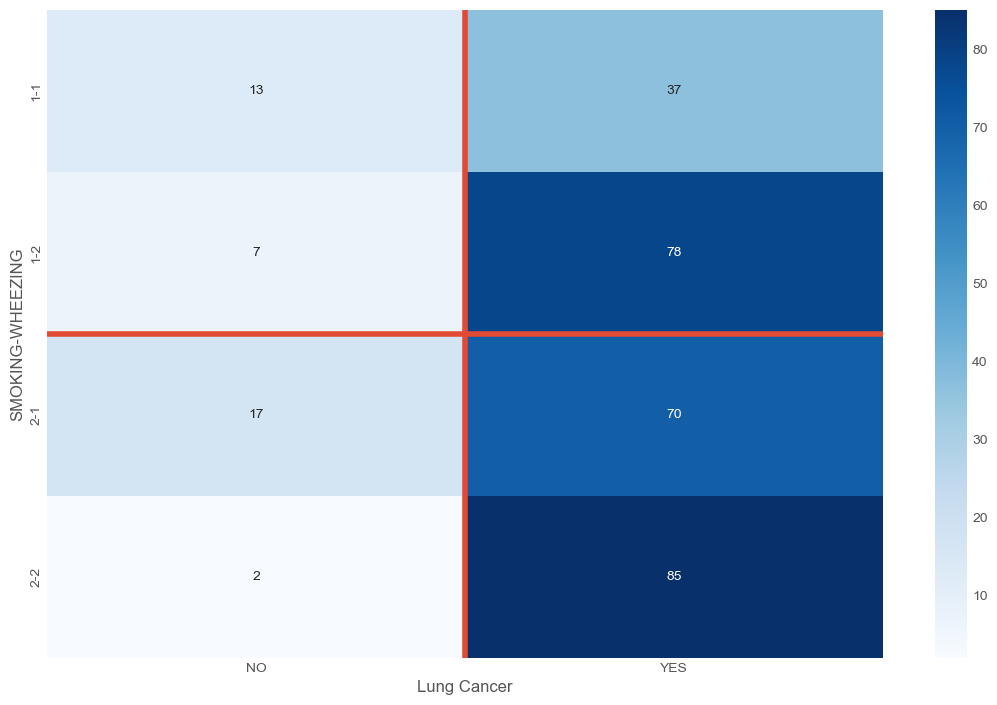

In [16]:
#HIGHLIGHT THE VARIANCE BETWEEN SMOKING AS A CAUSATIVE FACTOR AND ALCOHOL AS A CAUSATIVE FACTOR

#Contingency table for alcohol and wheezing

ALCOHOL_WHE = pd.crosstab([df['ALCOHOL CONSUMING'],df['WHEEZING']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(ALCOHOL_WHE, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer')


#Contingency table for smoking and wheezing

SMOK_WHE = pd.crosstab([df['SMOKING'],df['WHEEZING']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(SMOK_WHE, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

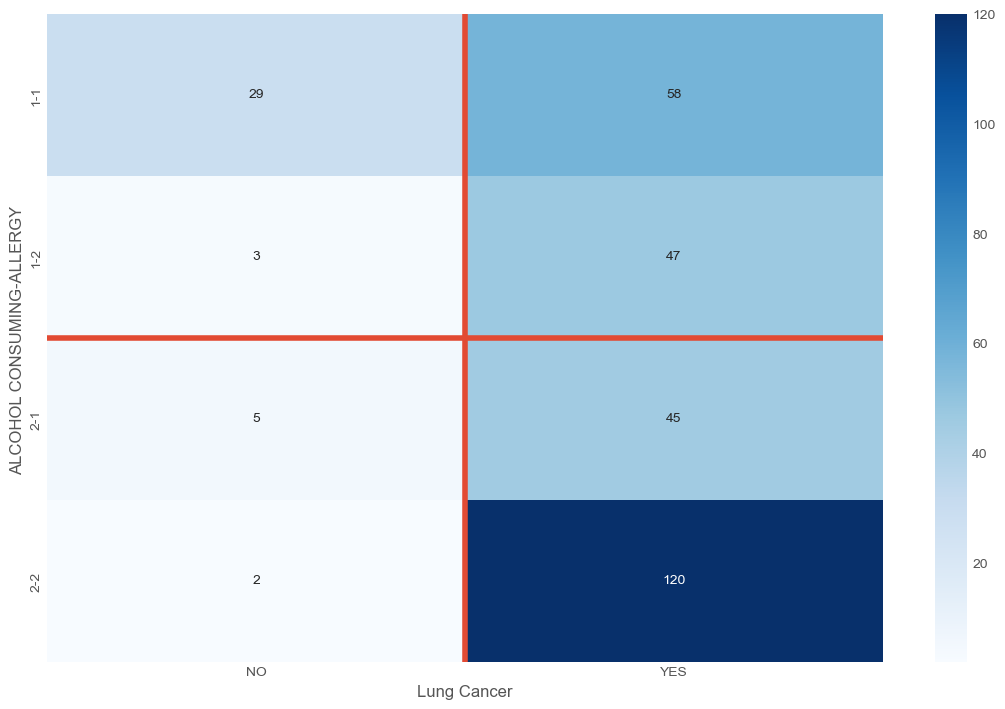

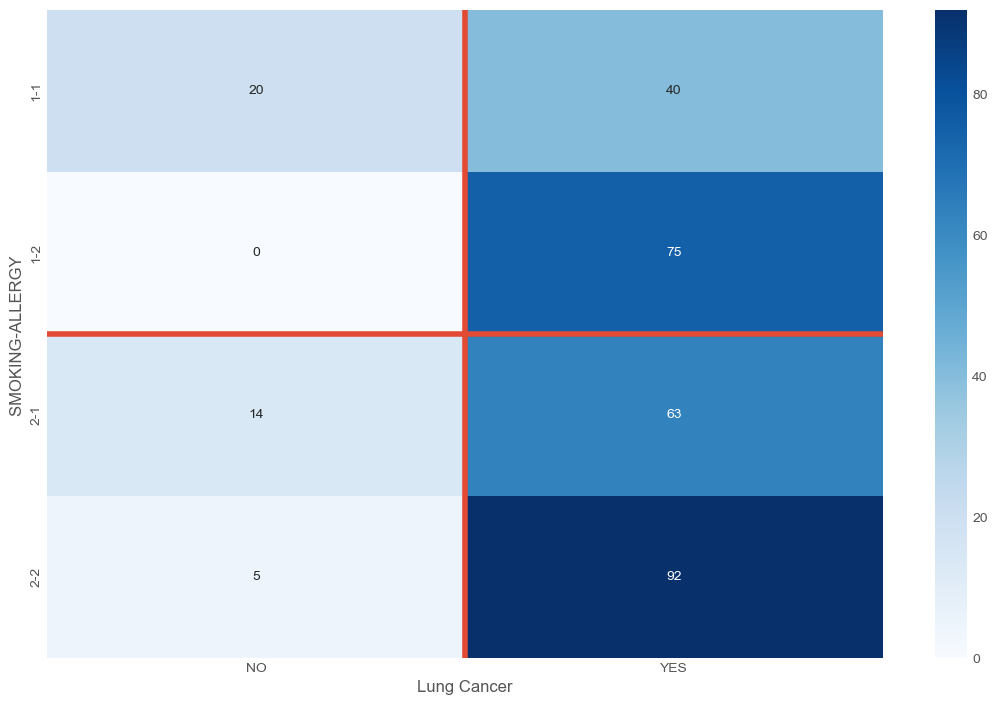

In [17]:
# HIGHLIGHT THE VARIANCE BETWEEN SMOKING AS A CAUSATIVE FACTOR AND ALCOHOL AS A CAUSATIVE FACTOR

# Contingency table for Alcohol and allergy

ALC_ALL = pd.crosstab([df['ALCOHOL CONSUMING'],df['ALLERGY ']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(ALC_ALL, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer')

# Contingency table for smoking and allergy

SMOK_ALL = pd.crosstab([df['SMOKING'],df['ALLERGY ']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(SMOK_ALL, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

In [18]:
# AGE does not change too much between just having lung cancer or not

df['AGE'].groupby(df['LUNG_CANCER']).agg('mean')

# 
pd.DataFrame(df['AGE'].groupby([df['LUNG_CANCER'],df['SMOKING'],df['CHRONIC DISEASE'],df['ALCOHOL CONSUMING']]).agg('median'))



AGE
LUNG_CANCER SMOKING CHRONIC DISEASE ALCOHOL CONSUMING      
NO          1       1               1                  59.0
                                    2                  55.0
                    2               1                  62.5
                                    2                  61.0
            2       1               1                  60.0
                                    2                  64.0
                    2               1                  59.0
YES         1       1               1                  62.0
                                    2                  63.0
                    2               1                  66.5
                                    2                  63.5
            2       1               1                  65.0
                                    2                  62.0
                    2               1                  62.0
                                    2                  61.0

In [19]:
### CHI-SQUARE TEST OF INDEPENDENCE

## Chronic Disease
#Alcohol and Chronic Disease Independence
print(stats.chi2_contingency(ALCOHOL_CD))
#Smoking and Chronic Disease Independence
print(stats.chi2_contingency(SMOKE_CD))

## WHEEZING
#Alcohol and Wheezing Ind.
print(stats.chi2_contingency(ALCOHOL_WHE))
#Smoke and Wheezing Ind.
print(stats.chi2_contingency(SMOK_WHE))

## ALLERGY
#Alcohol and allergy ind.
print(stats.chi2_contingency(ALC_ALL))
#Smoking and allergy ind.
print(stats.chi2_contingency(SMOK_ALL))

Chi2ContingencyResult(statistic=32.71807238788851, pvalue=3.693239654106863e-07, dof=3, expected_freq=array([[ 8.58252427, 59.41747573],
       [ 8.70873786, 60.29126214],
       [10.72815534, 74.27184466],
       [10.98058252, 76.01941748]]))
Chi2ContingencyResult(statistic=5.5220708744834415, pvalue=0.13732447809234177, dof=3, expected_freq=array([[ 7.06796117, 48.93203883],
       [ 9.97087379, 69.02912621],
       [12.24271845, 84.75728155],
       [ 9.7184466 , 67.2815534 ]]))
Chi2ContingencyResult(statistic=40.16464529628642, pvalue=9.832305094524258e-09, dof=3, expected_freq=array([[ 10.22330097,  70.77669903],
       [  7.06796117,  48.93203883],
       [  7.06796117,  48.93203883],
       [ 14.6407767 , 101.3592233 ]]))
Chi2ContingencyResult(statistic=21.77979264113544, pvalue=7.2487702332178e-05, dof=3, expected_freq=array([[ 6.31067961, 43.68932039],
       [10.72815534, 74.27184466],
       [10.98058252, 76.01941748],
       [10.98058252, 76.01941748]]))
Chi2ContingencyResu

In [20]:
# Logistical Regression

X = df[['SMOKING', 'ALCOHOL CONSUMING', 'CHRONIC DISEASE']]  # Binary predictor variables
y = df['LUNG_CANCER']  # Binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          NO       0.00      0.00      0.00         2
         YES       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62

Confusion Matrix:
 [[ 0  2]
 [ 0 60]]
Accuracy Score: 0.967741935483871


/Users/nicksartino/anaconda3/envs/Jupyter/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nicksartino/anaconda3/envs/Jupyter/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nicksartino/anaconda3/envs/Jupyter/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [21]:
# Sort the DataFrame by the AGE_BINS column

age_order = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['AGE_BINS'] = pd.Categorical(df['AGE_BINS'], categories=age_order, ordered=True)
df = df.sort_values('AGE_BINS')

# Reindex the DataFrame
df = df.reset_index(drop=True)

# Print the sorted DataFrame
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_BINS,FAH
0,F,21,2,1,1,1,2,2,2,1,1,1,2,1,1,NO,20-29,5
1,M,39,2,1,1,2,1,2,2,2,2,1,2,1,2,YES,30-39,5
2,F,38,1,2,1,1,2,2,2,2,1,2,2,1,2,YES,30-39,4
3,F,44,2,2,2,2,2,2,1,1,1,1,2,2,1,YES,40-49,5
4,F,47,2,2,1,2,2,2,2,2,1,2,2,1,1,YES,40-49,5
